In [1]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os

In [2]:
files_pos = os.listdir('F:/NLP/aclImdb/train/pos')
files_pos=[open('F:/NLP/aclImdb/train/pos/'+f,'r',encoding='utf8').read() for f in files_pos]
files_neg = os.listdir('F:/NLP/aclImdb/train/neg')
files_neg=[open('F:/NLP/aclImdb/train/neg/'+f,'r',encoding='utf8').read() for f in files_neg]

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
len(files_pos),len(files_neg)

(12500, 12500)

In [4]:
files_pos=files_pos[0:1000]
files_neg=files_neg[0:1000]

In [5]:
len(files_pos),len(files_neg)

(1000, 1000)

In [6]:
all_words=[]
documents=[]

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('english')))
# j is adject,r is adverb, and v is verb
# allowed_word_type = ["J","R","V"]
allowed_word_types=["J"]

for p in files_pos:
    
    #create a list of tuples where the first element of each tuple is a reciew
    # the second element is the label
    documents.append((p,"pos"))
    
    #remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',p)
    #tokenize
    tokenized = word_tokenize(cleaned)
    #remove stopwards
    stopped = [w for w in tokenized if not w in stop_words]
    #part of speech tagging for each word
    pos = nltk.pos_tag(stopped)
    #make a list of all adjectives identified by the allowed word types list above 
    for  w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
for p in files_neg:
    #create a list of tuples where the first element of each tuple is a review
    #the second element is the label
    documents.append((p,"neg"))
    #remove punctuation 
    cleaned = re.sub(r'[^(a-zA-Z)\s]',"",p)
    
    # tokenization
    tokenized = word_tokenize(cleaned)
    #remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]
    #part of speech tagging for each word
    neg=nltk.pos_tag(stopped)
    #make a list of all adjectives identified by the allowed word types list above 
    
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
    

In [7]:
#creating a frequency distribution of each adjectives
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1157, 'bad': 743, 'great': 660, 'much': 482, 'little': 482, 'many': 480, 'first': 374, 'best': 357, 'real': 317, 'br': 302, ...})

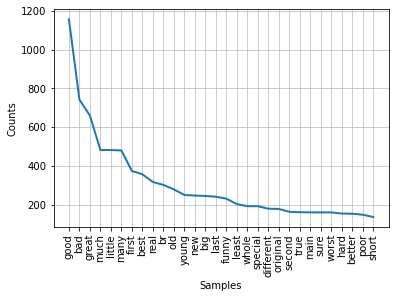

In [8]:
import matplotlib.pyplot as plt
all_words.plot(30,cumulative=False)
plt.show()

In [9]:
#listing the 1000 most frequent words
word_features = list(all_words.keys())[:1000]


In [10]:
# function to create a dictionary of features for each review in the list document.
# The keys are the words in word_features
# The value of each key are either true or false for wether that features appears in the review or not

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w]=(w in words)
    return features
#creating features for each review
featuresets = [(find_features(rev),category) for (rev,category) in documents]

# shuffling the documents
random.shuffle(featuresets)

training_set=featuresets[:800]
testing_set = featuresets[800:]
        

In [11]:
training_set[:10]

[({'scramble': False,
   'insightful': False,
   'right': True,
   'pathetic': False,
   'pettiness': False,
   'whole': False,
   'episode': False,
   'burn': False,
   'classic': False,
   'many': True,
   'human': False,
   'most': True,
   'next': True,
   'live': False,
   'wall': False,
   'br': True,
   'rich': False,
   'bet': False,
   'future': False,
   'thrown': False,
   'cant': False,
   'nickname': False,
   'forehead': False,
   'mutual': False,
   'love': True,
   'necessary': False,
   'observant': False,
   'slapstick': False,
   'valuable': False,
   'stupid': False,
   'brilliant': False,
   'dramatic': False,
   'second': False,
   'good': True,
   'dishonest': False,
   'funny': False,
   'fantastic': False,
   'crush': False,
   'usual': False,
   'hospital': False,
   'invade': False,
   'alltime': False,
   'legs': False,
   'big': False,
   'better': False,
   'underrated': False,
   'realistic': True,
   'flat': False,
   'lovable': False,
   'impressive': F

In [12]:
classifier = nltk.NaiveBayesClassifier.train((training_set))
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier,testing_set))*100)
classifier.show_most_informative_features(15)

Classifier accuracy percent: 73.41666666666666
Most Informative Features
              incredible = True              pos : neg    =      8.7 : 1.0
                powerful = True              pos : neg    =      8.7 : 1.0
                  superb = True              pos : neg    =      8.1 : 1.0
               fantastic = True              pos : neg    =      6.5 : 1.0
                romantic = True              pos : neg    =      6.3 : 1.0
             unnecessary = True              neg : pos    =      5.6 : 1.0
                     cry = True              pos : neg    =      5.1 : 1.0
                  finest = True              pos : neg    =      5.1 : 1.0
                     tea = True              pos : neg    =      5.1 : 1.0
                 amazing = True              pos : neg    =      5.0 : 1.0
              impressive = True              pos : neg    =      4.8 : 1.0
           disappointing = True              neg : pos    =      4.8 : 1.0
                 shallow = 

In [14]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [16]:
MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(mnb_cls,testing_set))*100)

Classifier accuracy percent: 75.41666666666667


In [17]:
BNB_clf = SklearnClassifier(BernoulliNB())
bnb_cls = BNB_clf.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(bnb_cls,training_set))*100)

Classifier accuracy percent: 85.625
